<img src="https://shwetkm.github.io/upxlogo.png"></img>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import time
import random
%matplotlib inline

### Dataset information
[**SPECTF**](https://archive.ics.uci.edu/ml/machine-learning-databases/spect/) dataset from UCI machine learning repository

   The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images.
   Each of the patients is classified into two categories: normal and abnormal.
   The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images.
   As a result, 44 continuous feature pattern was created for each patient.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test'
col_names = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf= pd.read_table(url,sep=',',names=col_names)

In [3]:
#check the head of the data
spectf.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [4]:
spectf.shape

(187, 45)

 dataset has 187 records and 45 variables including target variable

Text(0.5, 1, 'Correlation between different features')

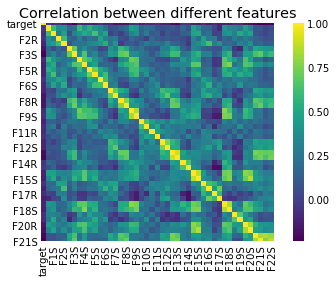

In [5]:
#check the correlation between the variables
correlation = spectf.corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [6]:
# store target variable in target variable and drop it from the spectf dataframe
target=spectf['target']
spectf.drop('target',axis=1,inplace=True)

In [7]:
# Let's train a LogisticRegression model and record the time taken to train before applying PCA
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=5)
start=time.time()
clf.fit(spectf,target,random.seed(1))
end=time.time()
training_time_before_pca=end-start
print("Time taken to train the model with all the variables is {}.".format(training_time_before_pca))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Time taken to train the model with all the variables is 0.6825947761535645.


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


 strandadising the variables

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std = scaler.fit_transform(spectf)

## PCA
Principal component analysis is a statistical procedure that uses an **orthogonal transformation** to convert a set of observations of possibly **correlated variables** into a set of values of **linearly uncorrelated variables** called principal components
- With PCA we can reduce the dimentions with out losing much information
- PCA also helps to remove the multicollinearity between the variables

Text(15, 0.9, '15')

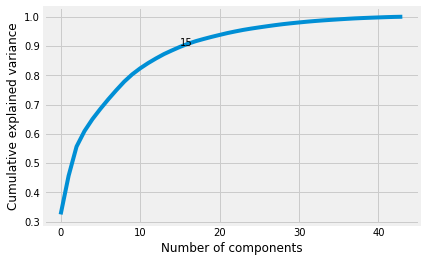

In [9]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('15',xy=(15, .90))

This cumilative explained variance graph helps us to choose the number of desired principal components 
- **90%** variation in the data is explaining by the first **15 principal components** 

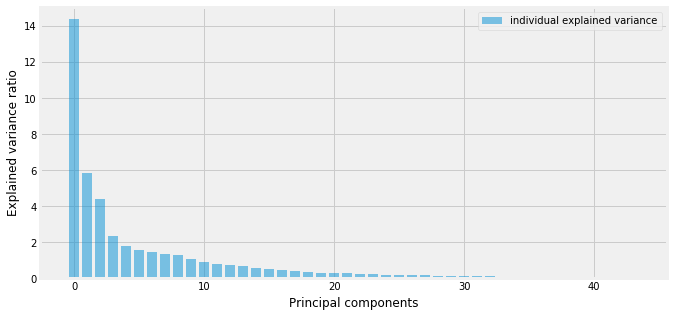

In [10]:
# individual explained variance
plt.figure(figsize=(10, 5))

plt.bar(range(44), pca.explained_variance_, alpha=0.5,
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

PCA transforms a set of correlated variables into a set of  linearly uncorrelated variables called principal components, we can check the correlarion with a heat map of correlation matrix

Text(0.5, 1, 'Correlation between different features')

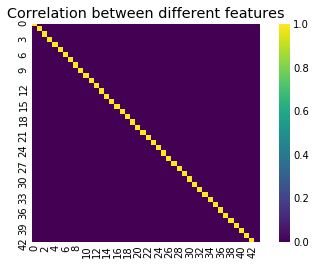

In [11]:
#correlation between the variables after transforming the data with PCA is 0
correlation = pd.DataFrame(PCA().fit_transform(X_std)).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

check the performance after considering the first 15 principal components

In [12]:
#consider first 15 components as they are explaining the 90% of variation in the data
x_pca = PCA(n_components=15)
spectf_pca = x_pca.fit_transform(X_std)

In [13]:
clf1=LogisticRegressionCV(cv=5)
start=time.time()
clf1.fit(spectf_pca,target)
end=time.time()
training_time_after_pca =end - start
print("Time taken to train the model with 15 components is {}.".format(training_time_after_pca))

Time taken to train the model with 15 components is 0.1108393669128418.


In [14]:
print('training time before pca' +': '+str(training_time_before_pca))
print('training time after pca'+': '+ str(training_time_after_pca))

training time before pca: 0.6825947761535645
training time after pca: 0.1108393669128418


 we can conclude that the computational time is reduced by several times after applying pca and selecting 15 principal components, And the variables are transformed to a new set of linearly uncorrelated variables